## Predicting Restaurant Ratings Using Machine Learning: A Case Study on Zomato Data

### Objective:
The objective of this project is to develop a linear regression model that can predict restaurant ratings based on various features available in the Zomato dataset, such as average cost, online delivery option, location, cuisines, and more. By analyzing these factors, the project aims to understand which attributes most influence customer ratings. This can help restaurant owners, food platforms, and customers make data-driven decisions.

### Dataset Overview
The dataset contains information about 51,717 restaurants in Bangalore, sourced from zomato. It provides a rich collection of features such as restaurant name, location,cuisine type, cost, rating and other service related attributes. The dataset contains 17 variables including both numerical and categorical.
Variables:
1. name
2. online_table
3. book_table
4. rate ( This is our target variable)
5. votes
6. phone
7. location
8. rest_type
9. dish_liked
10. cuisines
11. approx_cost (for two people)
12. menu_item
13. listed_in(type)
14. listed_in(city)
15. Url
16. address
17. reviews_list

In [76]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading and Observing dataset

In [77]:
# loading dataset
df=pd.read_csv("/content/zomato.csv",on_bad_lines="skip",encoding="utf-8",engine="python")

In [78]:
df.sample(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
18795,https://www.zomato.com/bangalore/donne-biriyan...,"4/1, 80 Feet Road, Michael Palya, Indiranagar,...",Donne Biriyani Mane,Yes,No,3.8/5,140,080 49653503,Indiranagar,Quick Bites,"Donne Biryani, Chicken Biryani Combo, Pepper C...","Biryani, Kebab",400,"[('Rated 4.0', 'RATED\n It was a very differe...",[],Dine-out,Indiranagar
49634,https://www.zomato.com/bangalore/ganesh-bhavan...,"256, AECS Layout, A Block, 1st Main Road, Kund...",Ganesh Bhavan,No,No,4.0 /5,76,+91 9535399999,Brookefield,Quick Bites,NaN,South Indian,200,"[('Rated 1.0', 'RATED\n These dumb people acc...",[],Delivery,Whitefield
36831,https://www.zomato.com/bangalore/b-hive-korama...,"43/A, 1st Main, Near Wipro Park, Jakkasandra R...",B-hive,No,Yes,4.3 /5,1559,080 49652932,Koramangala 1st Block,Pub,"Tandoori Chicken, Cocktails, Noodles, Beer, Na...","Finger Food, North Indian","1,200","[('Rated 5.0', 'RATED\n Good food and polite ...",[],Dine-out,Koramangala 7th Block
16688,https://www.zomato.com/bangalore/bonum-cibum-h...,"1502, Ground Floor, Sector 1, HSR Layout, HSR,...",Bonum cibum,Yes,No,4.5/5,196,080 22588010\r\n+91 9740134417,HSR,Casual Dining,"Shawarma, Pasta, Falafel, Mocktails, Babaganus...","Lebanese, Turkish","1,200","[('Rated 1.0', 'RATED\n This is a restaurant ...",[],Delivery,HSR
22035,https://www.zomato.com/bangalore/sandwich-hub-...,"616/2, 31st Cross, 10th A Main Road, 4th Block...",Sandwich Hub,Yes,No,3.4/5,11,+91 9343264000,Jayanagar,Quick Bites,NaN,"Fast Food, Sandwich",300,"[('Rated 3.0', ""RATED\n Ordered a simple toas...","['Veg Cheese Sandwich', 'Veg Grilled Sandwich'...",Delivery,JP Nagar


In [79]:
# Cheking for the shape of data
df.shape

(51155, 17)

In [80]:
# To know basic information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51155 entries, 0 to 51154
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51155 non-null  object
 1   address                      51155 non-null  object
 2   name                         51155 non-null  object
 3   online_order                 51155 non-null  object
 4   book_table                   51155 non-null  object
 5   rate                         43380 non-null  object
 6   votes                        51155 non-null  int64 
 7   phone                        49952 non-null  object
 8   location                     51134 non-null  object
 9   rest_type                    50931 non-null  object
 10  dish_liked                   23081 non-null  object
 11  cuisines                     51110 non-null  object
 12  approx_cost(for two people)  50811 non-null  object
 13  reviews_list                 51

In [81]:
# to convert approx_cost into a numerical variable
df["approx_cost(for two people)"]=df["approx_cost(for two people)"].str.replace(",","").astype(float)

In [82]:
# To know the number of uniqe categories in each categorical feature
df.select_dtypes(include="object").nunique()

,0
url,51155
address,11485
name,8783
online_order,2
book_table,2
rate,64
phone,14888
location,93
rest_type,93
dish_liked,5232


In [83]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

In [84]:
# Checking for null values
df.isnull().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1203
location,21
rest_type,224


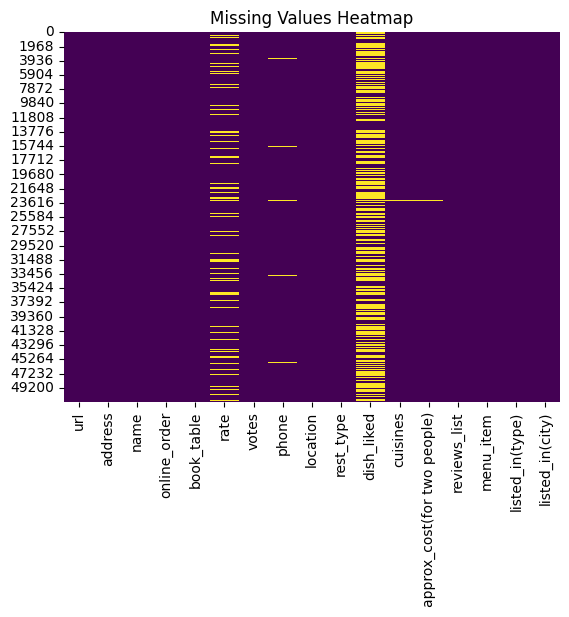

In [85]:
# Heatmap of missing values
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

Columns dish_liked and rate has large number of missing values.

### Data Cleaning and Handling Missing values

I am going to drop url, address, phone, menu_item,reviews_list columns because they are either identifiers, unstructured free-text or highly unique to each restaurant. So they are not useful and informative for prediction. I am also dropping column dish_liked since it contains more than 50% missing values.

In [86]:
# Dropping unwanted columns
df.drop(["url","address","phone","menu_item","dish_liked"],axis=1,inplace=True)

In [87]:
#  Handling missing values
# Drop rows where rate is null (it’s a target feature)
# Clean and convert rate
df['rate'] = df['rate'].apply(lambda x: str(x).split('/')[0].strip()).replace('NEW', np.nan).replace('-', np.nan)
df['rate'] = df['rate'].astype(float)
# Drop rows where rate is null (it’s a target feature)
df = df[df['rate'].notnull()]
# Impute or clean other nulls
df['rest_type'].fillna('Unknown', inplace=True)
df['cuisines'].fillna('Other', inplace=True)
df['location'].fillna('Other', inplace=True)

# Clean and convert cost
df["approx_cost(for two people)"].fillna(df["approx_cost(for two people)"].median(), inplace=True)
# Impute or clean other nulls
df['rest_type'].fillna('Unknown', inplace=True)
df['cuisines'].fillna('Other', inplace=True)
df['location'].fillna('Other', inplace=True)

In [88]:
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
location,0
rest_type,0
cuisines,0
approx_cost(for two people),0
reviews_list,0


In [89]:
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
Index: 41105 entries, 0 to 51154
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         41105 non-null  object 
 1   online_order                 41105 non-null  object 
 2   book_table                   41105 non-null  object 
 3   rate                         41105 non-null  float64
 4   votes                        41105 non-null  int64  
 5   location                     41105 non-null  object 
 6   rest_type                    41105 non-null  object 
 7   cuisines                     41105 non-null  object 
 8   approx_cost(for two people)  41105 non-null  float64
 9   reviews_list                 41105 non-null  object 
 10  listed_in(type)              41105 non-null  object 
 11  listed_in(city)              41105 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 4.1+ MB


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
37585,Shawarma Inc,Yes,No,3.1,28,Brigade Road,Food Court,"Rolls, Lebanese",250.0,"[('Rated 3.0', 'RATED\n Amazing food. One of ...",Delivery,Lavelle Road
21176,Barbeque Nation,No,Yes,4.8,3864,JP Nagar,Casual Dining,"North Indian, European, Mediterranean, BBQ, Kebab",1600.0,"[('Rated 5.0', 'RATED\n It is awesome place. ...",Dine-out,Jayanagar
19915,Chinese House,Yes,No,2.8,19,Jayanagar,Quick Bites,"Chinese, Thai, Momos",300.0,"[('Rated 1.0', ""RATED\n Please DON'T VISIT th...",Delivery,Jayanagar
18031,Hotel Hyperdine,Yes,No,2.5,66,Indiranagar,Quick Bites,"North Indian, Chinese, Arabian",350.0,"[('Rated 5.0', 'RATED\n Good service'), ('Rat...",Delivery,Indiranagar
270,Jalaram Sweets,Yes,No,3.8,32,Jayanagar,Sweet Shop,"Desserts, Mithai",250.0,"[('Rated 4.0', 'RATED\n Located perfectly opp...",Delivery,Banashankari


### Encoding of Categorical Variables
We will use Level-Encoding for binary variables and One-Hot-Encoding for multicategory columns.

In [90]:
# Level Encoding
from sklearn.preprocessing import LabelEncoder
binary_cols=["online_order","book_table"]
le=LabelEncoder()
for col in binary_cols:
  df[col]=le.fit_transform(df[col])
# One-Hot-Encoding
df=pd.get_dummies(df,columns=["location","rest_type","cuisines","listed_in(type)","listed_in(city)"],drop_first=True, dtype=int)


In [91]:
df.sample(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),reviews_list,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
40005,Priyadarshini Veg,0,0,3.9,156,300.0,"[('Rated 4.0', ""RATED\n It's a branch of Priy...",0,0,0,...,0,0,1,0,0,0,0,0,0,0
5162,Kabab Magic,1,0,3.9,74,500.0,"[('Rated 5.0', ""RATED\n Best grilled chicken ...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
42420,Donne Biryani Mane,1,0,3.4,8,300.0,"[('Rated 4.0', ""RATED\n Don't judge a book by...",0,0,0,...,0,1,0,0,0,0,0,0,0,0
22100,Crumb Together,1,1,4.1,590,1200.0,"[('Rated 4.0', 'RATED\n Great ambience and fo...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
47629,RS Shiv Sagar Express,1,0,4.0,67,300.0,"[('Rated 5.0', ""RATED\n Located on the busy R...",0,0,0,...,0,0,0,0,0,0,0,1,0,0


### EDA

### Univariate Analysis

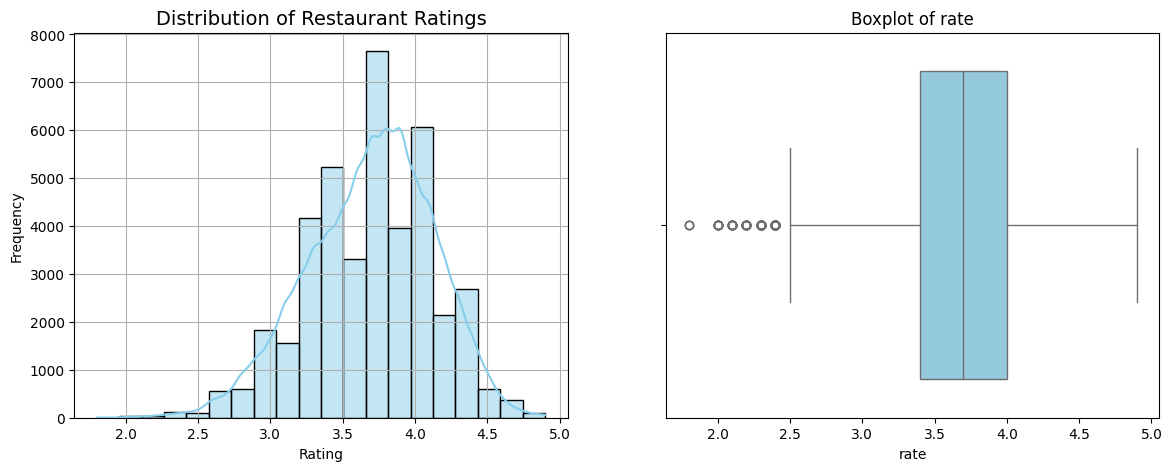

,rate
count,41105.000000
mean,3.694088
std,0.435111
min,1.800000
25%,3.400000
50%,3.700000
75%,4.000000
max,4.900000


In [92]:
# Target Variable "rate"
plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)
sns.histplot(df['rate'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Restaurant Ratings', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.subplot(1,2,2)
sns.boxplot(x=df["rate"],color="skyblue")
plt.title("Boxplot of rate")
plt.show()
df["rate"].describe()

#### Observations:
Most restaurant ratings lie between 3.0 and 4.5, forming a nearly normal distribution. Very few restaurants are rated below 3.0 or above 4.5, indicating stable customer satisfaction. There are a few outliers towards negative side.


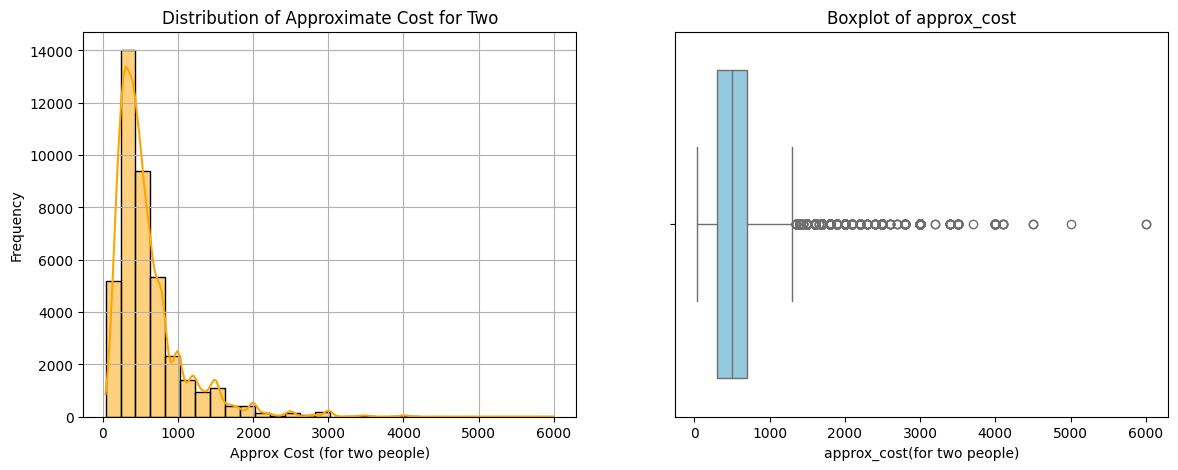

,approx_cost(for two people)
count,41105.000000
mean,595.908186
std,458.711700
min,40.000000
25%,300.000000
50%,500.000000
75%,700.000000
max,6000.000000


In [93]:
# approx_cost(for two people)
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(df['approx_cost(for two people)'], bins=30, kde=True, color='orange')
plt.title('Distribution of Approximate Cost for Two')
plt.xlabel('Approx Cost (for two people)')
plt.ylabel('Frequency')
plt.grid(True)
plt.subplot(1,2,2)
sns.boxplot(x=df["approx_cost(for two people)"],color="skyblue")
plt.title("Boxplot of approx_cost")
plt.show()
df["approx_cost(for two people)"].describe()

Observations:
Most restaurants charge below ₹700 for two people, and the distribution is highly right-skewed, indicating a few expensive outliers with very high cost. Also the distribution have to many outliers towards right side. So log transformation is needed.

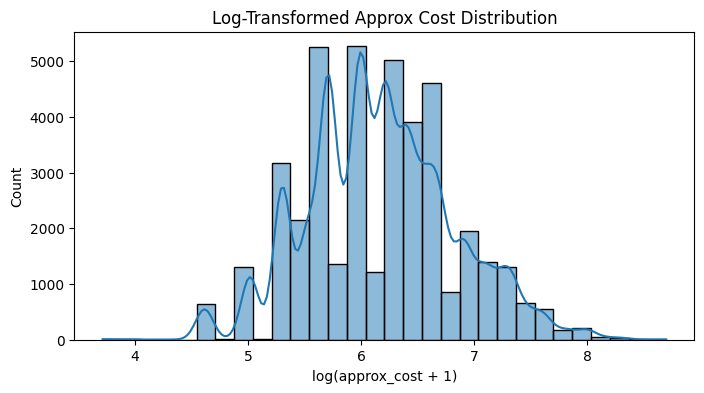

,cost_log
count,41105.000000
mean,6.170874
std,0.650261
min,3.713572
25%,5.707110
50%,6.216606
75%,6.552508
max,8.699681


In [94]:
# Log transformation
df['cost_log'] = np.log1p(df['approx_cost(for two people)'])
# Plotting
plt.figure(figsize=(8, 4))
sns.histplot(df['cost_log'], kde=True, bins=30,palette="Set2")
plt.title("Log-Transformed Approx Cost Distribution")
plt.xlabel("log(approx_cost + 1)")
plt.ylabel("Count")
plt.show()
df["cost_log"].describe()

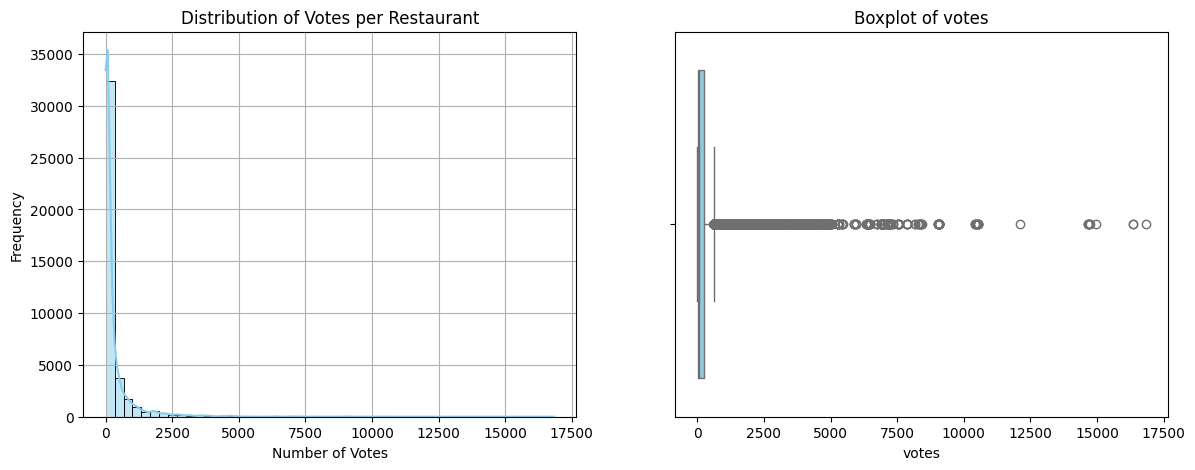

,votes
count,41105.000000
mean,323.364043
std,777.829326
min,0.000000
25%,21.000000
50%,71.000000
75%,261.000000
max,16832.000000


In [95]:
# Votes
plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)
sns.histplot(df['votes'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Votes per Restaurant')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.grid(True)
plt.subplot(1,2,2)
sns.boxplot(x=df["votes"],color="skyblue")
plt.title("Boxplot of votes")
plt.show()
df["votes"].describe()

#### Observations:
The distribution of votes is heavily right skewed and most of the retaurants have the votes below 71. There are to many outliers towards right side. So log transformation is needed.

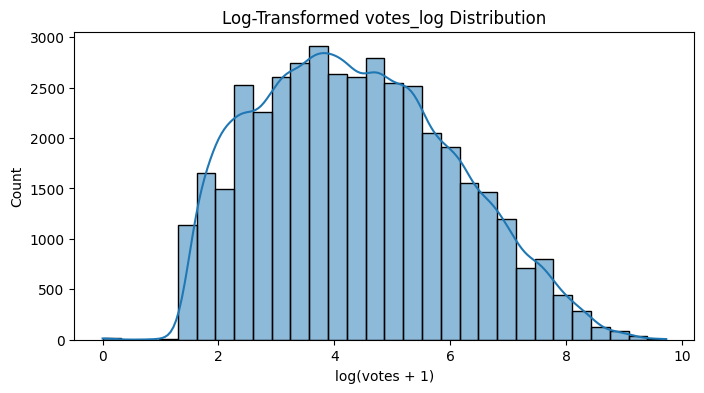

,votes_log
count,41105.000000
mean,4.392503
std,1.665543
min,0.000000
25%,3.091042
50%,4.276666
75%,5.568345
max,9.731097


In [96]:
# Log transformation
df['votes_log'] = np.log1p(df['votes'])
# Plotting
plt.figure(figsize=(8, 4))
sns.histplot(df['votes_log'], kde=True, bins=30,palette="Set2")
plt.title("Log-Transformed votes_log Distribution")
plt.xlabel("log(votes + 1)")
plt.ylabel("Count")
plt.show()
df["votes_log"].describe()

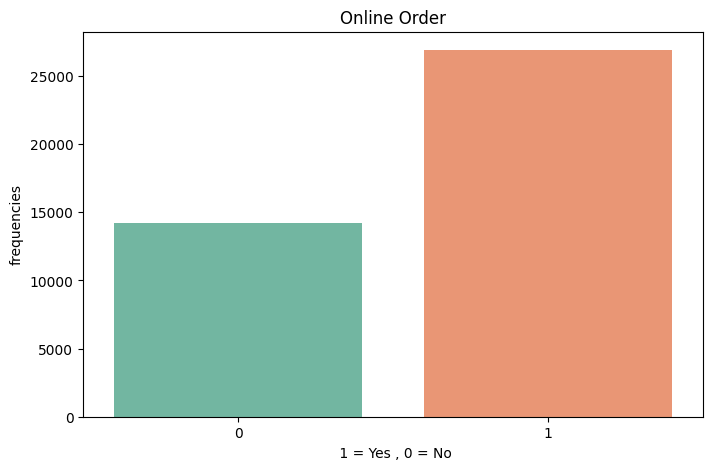

,proportion
online_order,
1,0.654762
0,0.345238


In [97]:
# Online_order
plt.figure(figsize=(8,5))
sns.countplot(df,x="online_order",palette="Set2")
plt.title("Online Order")
plt.xlabel(" 1 = Yes , 0 = No")
plt.ylabel("frequencies")
plt.show()
df["online_order"].value_counts(normalize=True)

#### Observations:
Around 66% of restaurants provide online ordering, while the remaining 34% do not. This indicates a strong preference or business trend toward offering online services in the restaurant industry.

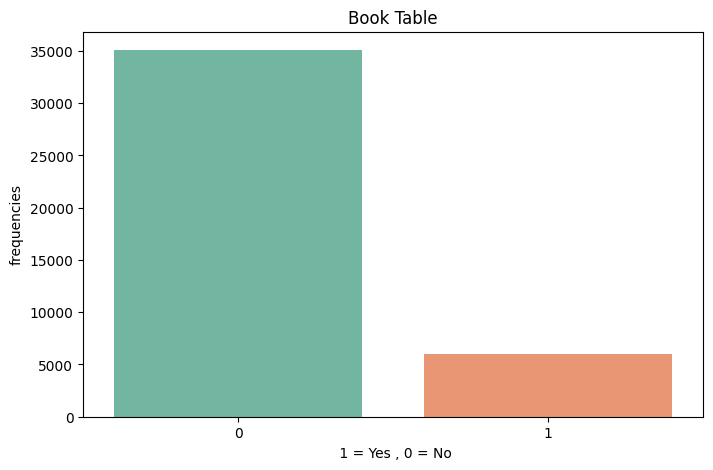

,proportion
book_table,
0,0.853619
1,0.146381


In [98]:
# book_table
plt.figure(figsize=(8,5))
sns.countplot(df,x="book_table",palette="Set2")
plt.title("Book Table")
plt.xlabel(" 1 = Yes , 0 = No")
plt.ylabel("frequencies")
plt.show()
df["book_table"].value_counts(normalize=True)

#### Observations:
Table booking is available in only 18% of restaurants, while 82% do not provide this service. This suggests that table booking is a rarely offered feature in this dataset.

#### All the graphs of univariate analysis at one place

<function matplotlib.pyplot.show(close=None, block=None)>

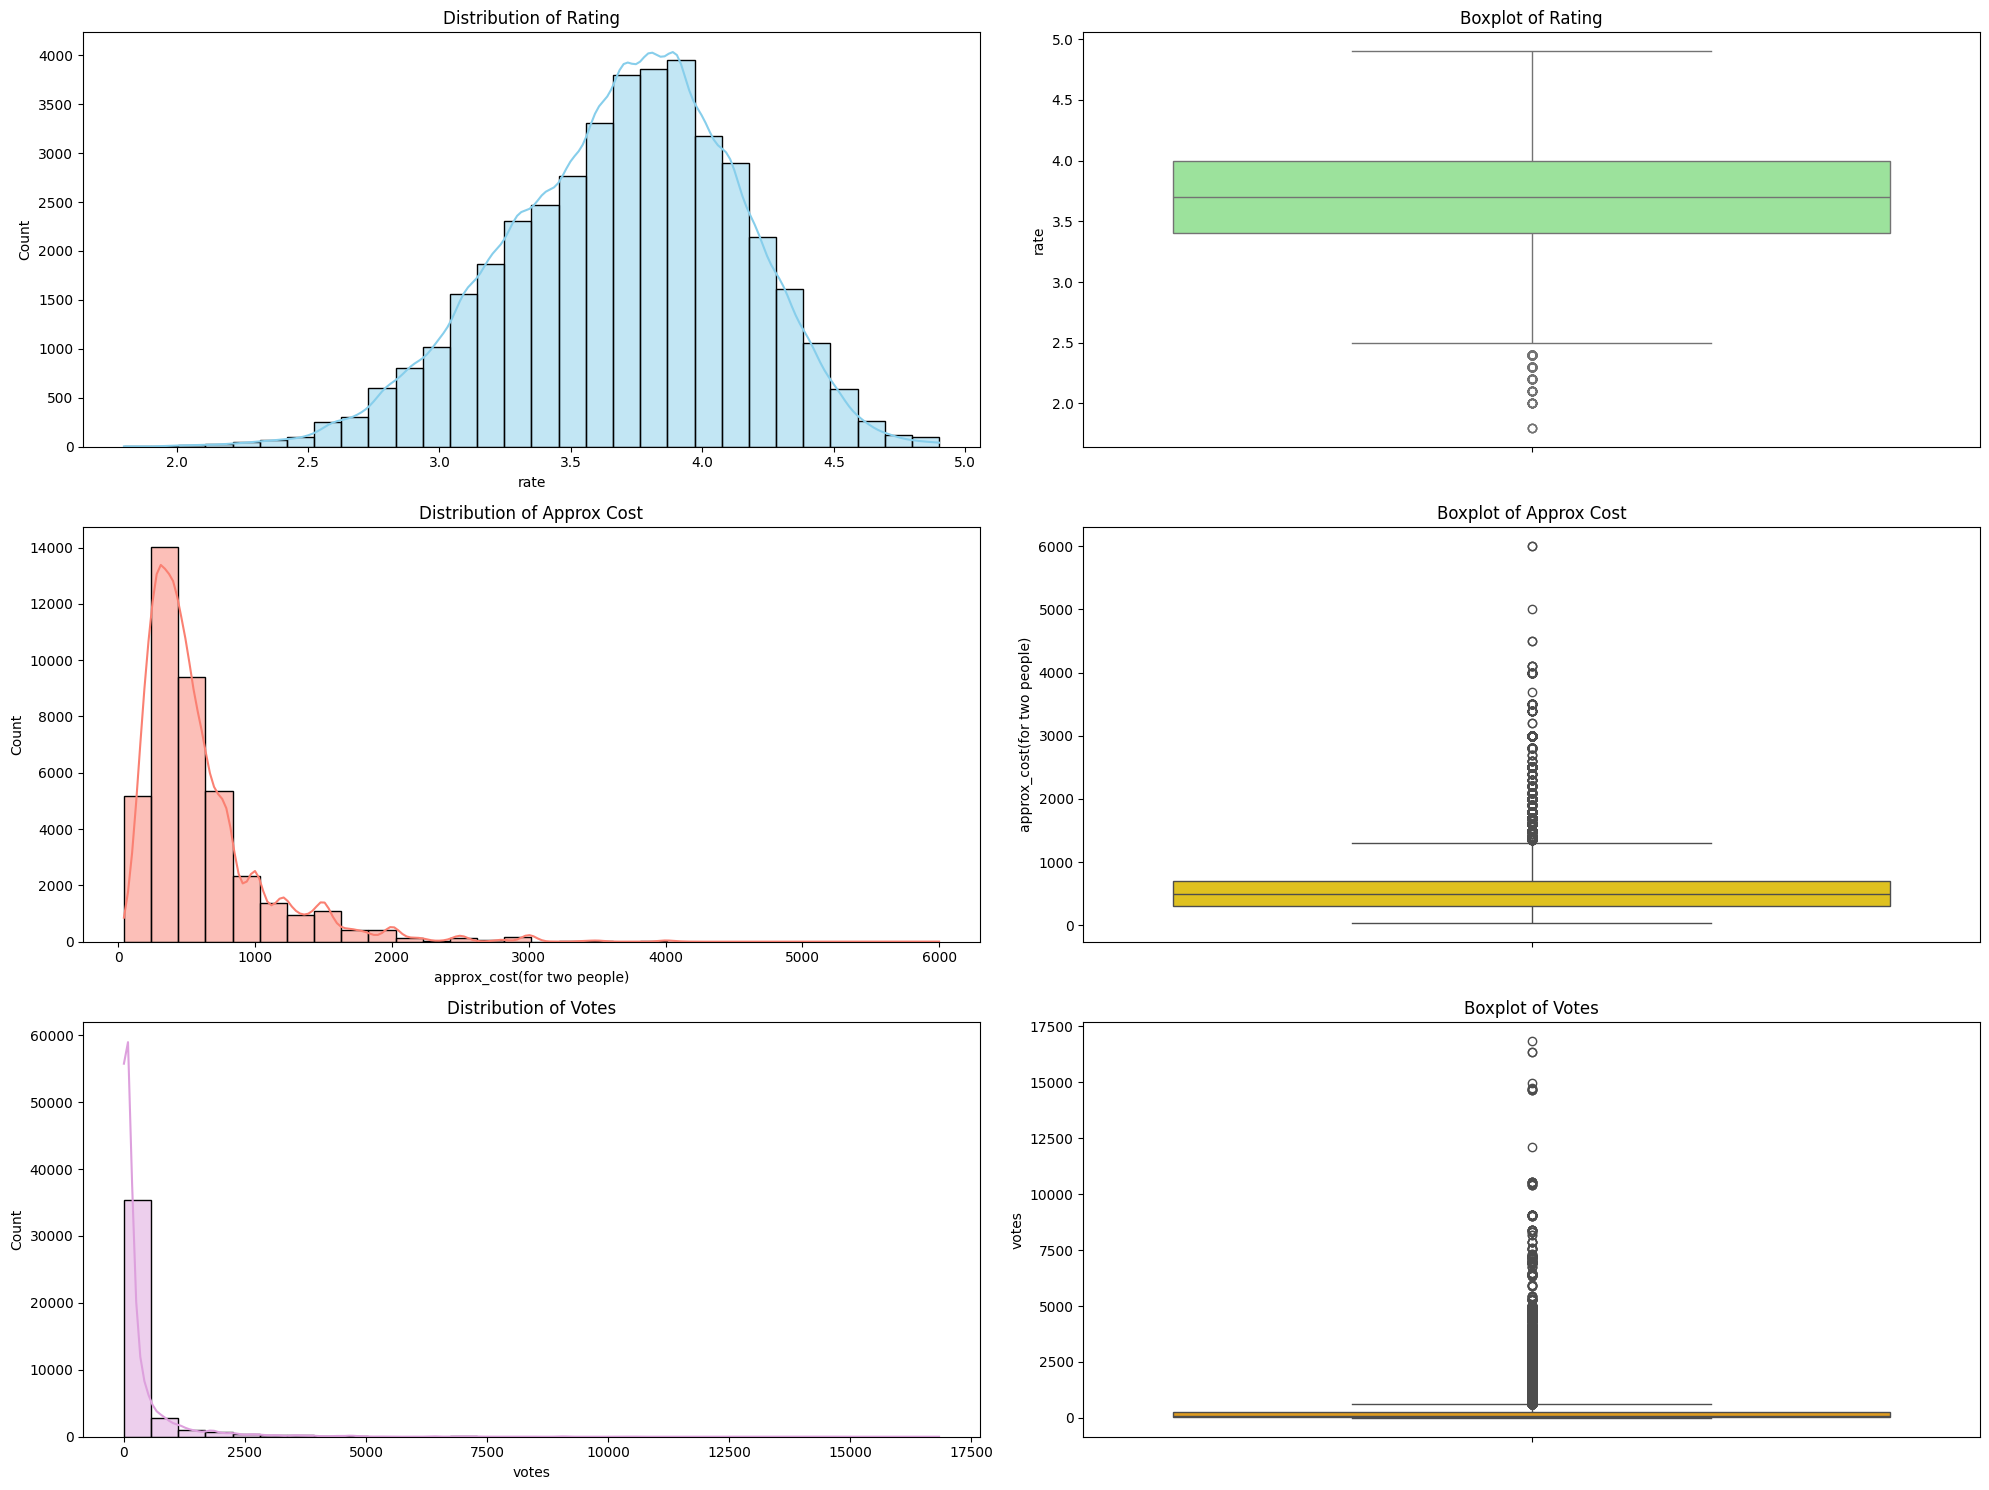

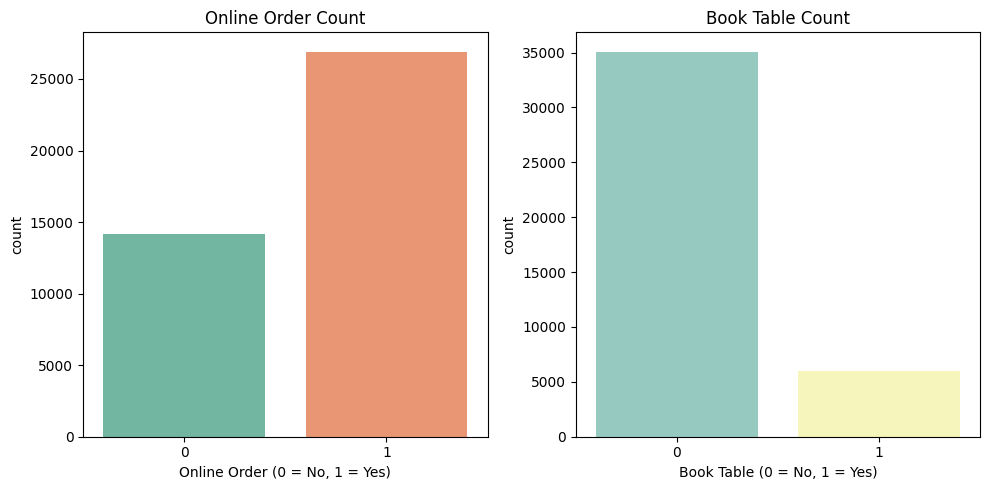

In [99]:

plt.figure(figsize=(20, 15))
# 1. Histogram + KDE for 'rate'
plt.subplot(3, 2, 1)
sns.histplot(df['rate'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Rating')
# 2. Boxplot for 'rate'
plt.subplot(3, 2, 2)
sns.boxplot(y=df['rate'], color='lightgreen')
plt.title('Boxplot of Rating')
# 3. Histogram + KDE for 'approx_cost(for two people)'
plt.subplot(3, 2, 3)
sns.histplot(df['approx_cost(for two people)'], kde=True, bins=30, color='salmon')
plt.title('Distribution of Approx Cost')
# 4. Boxplot for 'approx_cost(for two people)'
plt.subplot(3, 2, 4)
sns.boxplot(y=df['approx_cost(for two people)'], color='gold')
plt.title('Boxplot of Approx Cost')
# 5. Histogram + KDE for 'votes'
plt.subplot(3, 2, 5)
sns.histplot(df['votes'], kde=True, bins=30, color='plum')
plt.title('Distribution of Votes')
# 6. Boxplot for 'votes'
plt.subplot(3, 2, 6)
sns.boxplot(y=df['votes'], color='orange')
plt.title('Boxplot of Votes')
plt.tight_layout()
# Separate figure for Countplots (to avoid overcrowding)
plt.figure(figsize=(10, 5))
# 7. Countplot for 'online_order'
plt.subplot(1, 2, 1)
sns.countplot(x='online_order', data=df, palette='Set2')
plt.title('Online Order Count')
plt.xlabel('Online Order (0 = No, 1 = Yes)')
# 8. Countplot for 'book_table'
plt.subplot(1, 2, 2)
sns.countplot(x='book_table', data=df, palette='Set3')
plt.title('Book Table Count')
plt.xlabel('Book Table (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show

### Bivariate Analysis


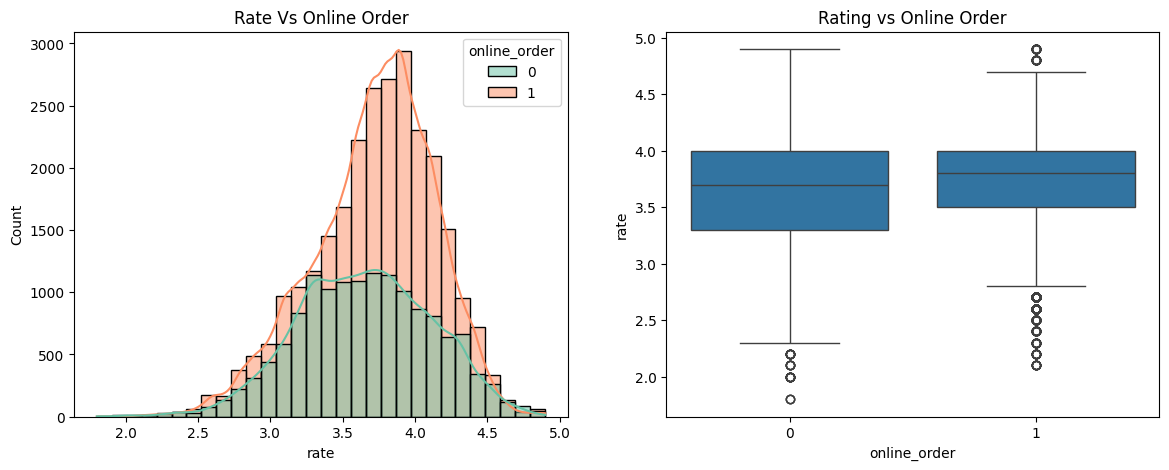

,rate
online_order,
0,3.650701
1,3.716965


In [100]:
# online_order vs rate
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(df,x="rate",hue="online_order",bins=30,kde=True,palette="Set2")
plt.title("Rate Vs Online Order")
plt.subplot(1,2,2)
sns.boxplot(x='online_order', y='rate', data=df)
plt.title('Rating vs Online Order')
plt.show()
df.groupby('online_order')['rate'].mean()

# Observations:
Restaurants offering online ordering have slightly higher average ratings (mean = 3.77) compared to those without it (mean = 3.65), indicating positive customer perception toward online order availability.

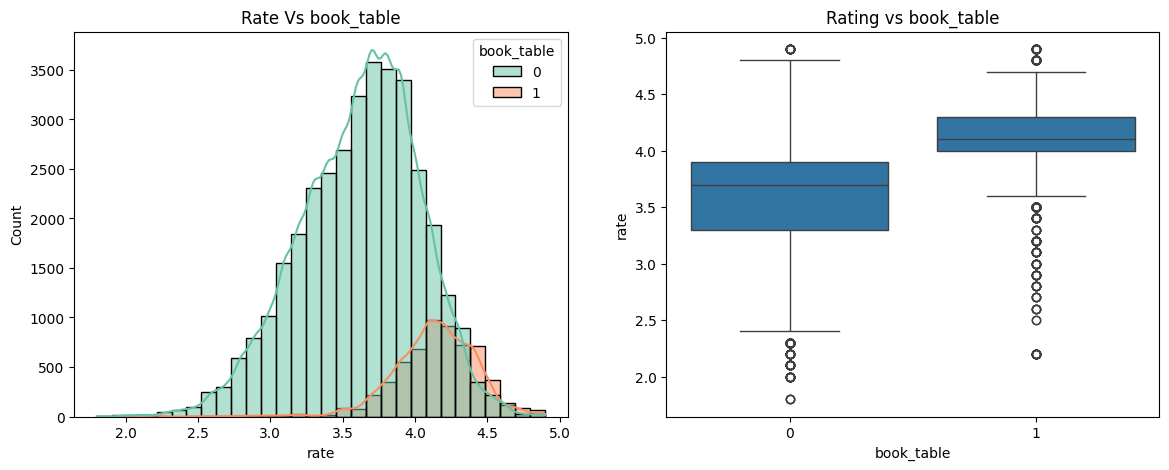

,rate
book_table,
0,3.619152
1,4.131079


In [101]:
# book_table vs rate
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(df,x="rate",hue="book_table",bins=30,kde=True,palette="Set2")
plt.title("Rate Vs book_table")
plt.subplot(1,2,2)
sns.boxplot(x='book_table', y='rate', data=df)
plt.title('Rating vs book_table')
plt.show()
df.groupby('book_table')['rate'].mean()

#### Observations:
Restaurants offering table booking have higher average ratings (4.13) than others (3.61), indicating better dine-in experience may positively influence customer ratings.

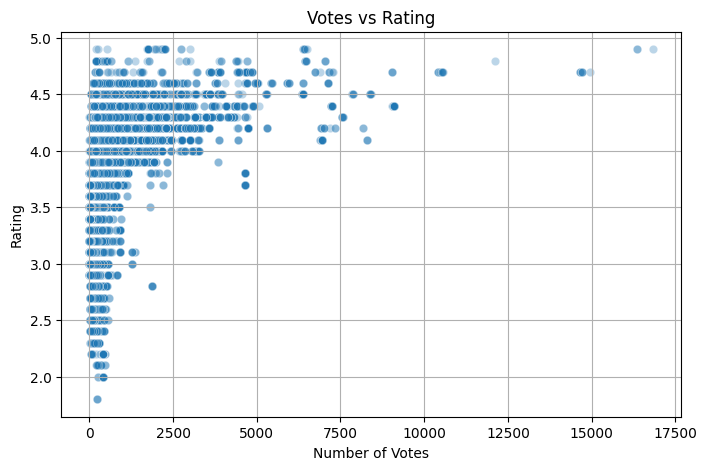

Correlation between rate and number of votes 0.4339611207093525


In [102]:
# votes vs rate
plt.figure(figsize=(8,5))
sns.scatterplot(x='votes', y='rate', data=df, alpha=0.3)
plt.title('Votes vs Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.grid(True)
plt.show()
print("Correlation between rate and number of votes",df["rate"].corr(df["votes"]))

#### Observations:
Ratings tend to increase with higher votes. Restaurants with more than 5000 votes usually have ratings above 4.0, indicating a mild positive correlation between popularity and rating.

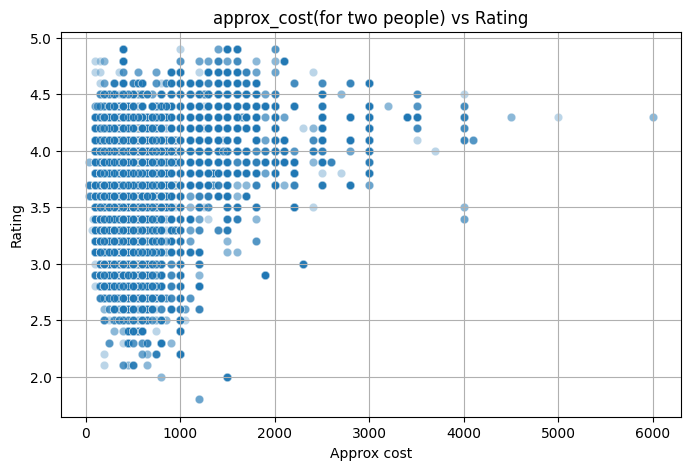

Correlation between rate and number of votes 0.37296286684123786


In [103]:
# approx_cost(for two people) vs rate
plt.figure(figsize=(8,5))
sns.scatterplot(x='approx_cost(for two people)', y='rate', data=df, alpha=0.3)
plt.title('approx_cost(for two people) vs Rating')
plt.xlabel("Approx cost")
plt.ylabel('Rating')
plt.grid(True)
plt.show()
print("Correlation between rate and number of votes",df["rate"].corr(df["approx_cost(for two people)"]))

#### Observations:
Higher-rated restaurants are mostly found in the mid-cost range (₹300–₹700). There’s no strong trend showing that higher cost guarantees better ratings.

#### All the graphs of bivariate analysis at one place

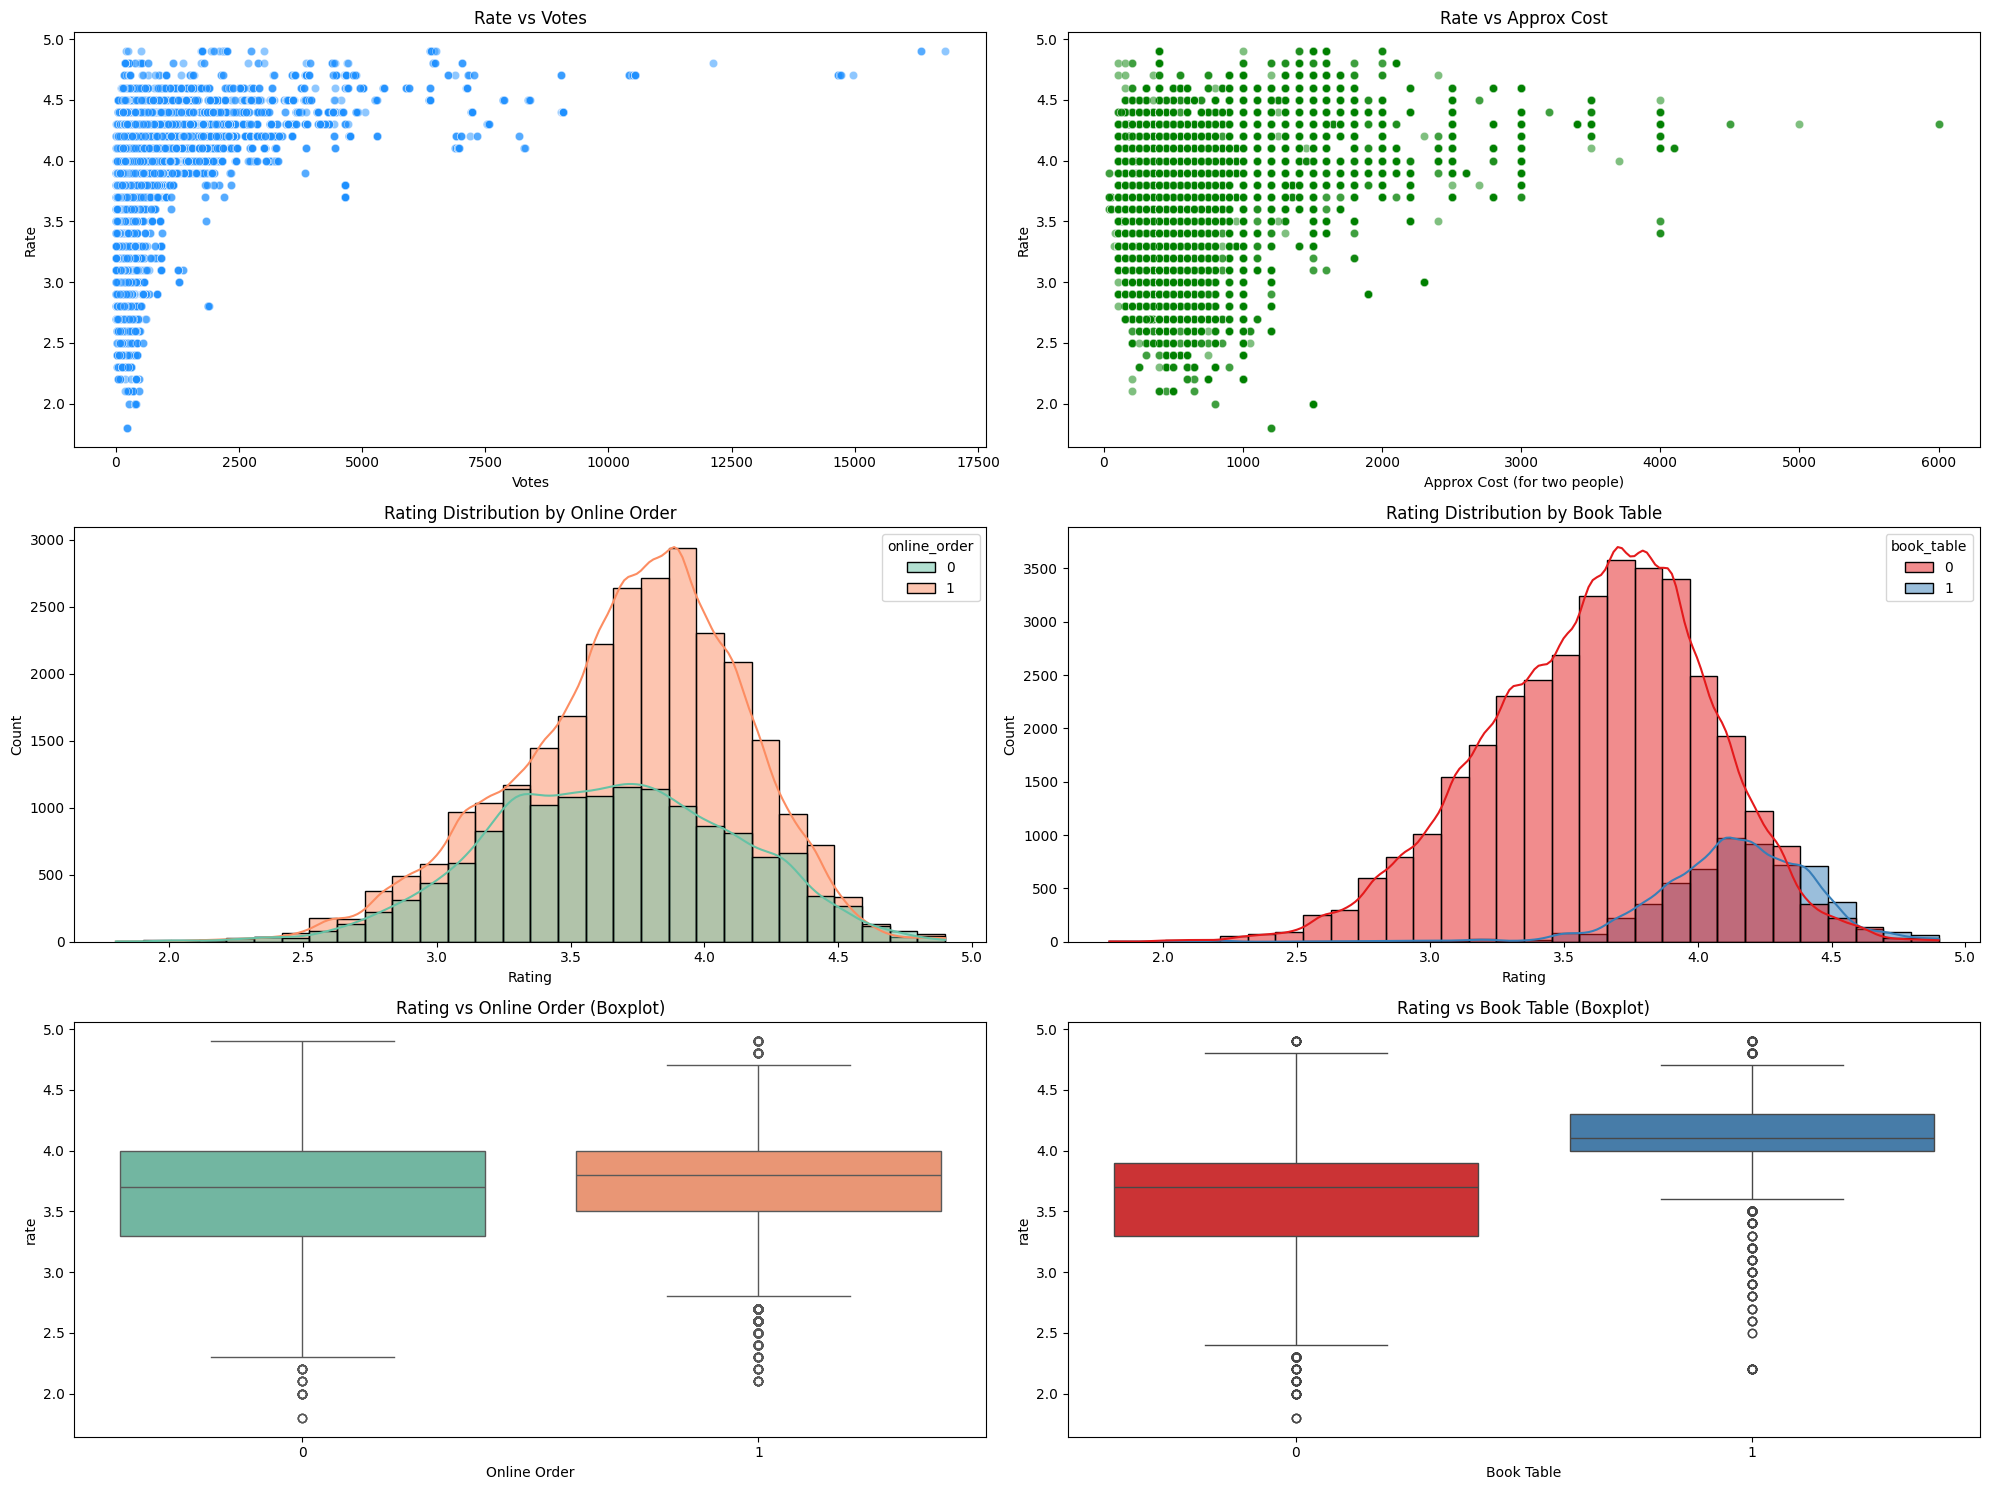

In [104]:
plt.figure(figsize=(20, 15))
# 1. Rate vs Votes - Scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x='votes', y='rate', data=df, alpha=0.5, color='dodgerblue')
plt.title('Rate vs Votes')
plt.xlabel('Votes')
plt.ylabel('Rate')
# 2. Rate vs Approx Cost - Scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x='approx_cost(for two people)', y='rate', data=df, alpha=0.5, color='green')
plt.title('Rate vs Approx Cost')
plt.xlabel('Approx Cost (for two people)')
plt.ylabel('Rate')
# 3. Rate by Online Order - Histplot with KDE
plt.subplot(3, 2, 3)
sns.histplot(data=df, x='rate', hue='online_order', kde=True, palette='Set2',bins=30)
plt.title('Rating Distribution by Online Order')
plt.xlabel('Rating')
# 4. Rate by Book Table - Histplot with KDE
plt.subplot(3, 2, 4)
sns.histplot(data=df, x='rate', hue='book_table', kde=True, palette='Set1', bins=30)
plt.title('Rating Distribution by Book Table')
plt.xlabel('Rating')
# 5. Boxplot: Rating vs Online Order
plt.subplot(3, 2, 5)
sns.boxplot(x='online_order', y='rate', data=df, palette='Set2')
plt.title('Rating vs Online Order (Boxplot)')
plt.xlabel('Online Order')
# 6. Boxplot: Rating vs Book Table
plt.subplot(3, 2, 6)
sns.boxplot(x='book_table', y='rate', data=df, palette='Set1')
plt.title('Rating vs Book Table (Boxplot)')
plt.xlabel('Book Table')
plt.tight_layout()
plt.show()

### Multivariate Analysis

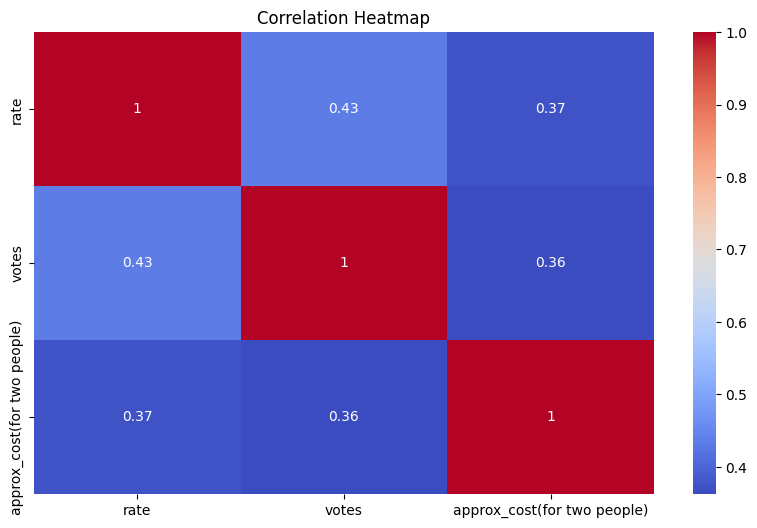

                       Feature       VIF
0                        const  5.673380
1                        votes  1.228428
2  approx_cost(for two people)  1.687681
3                 online_order  1.038166
4                   book_table  1.694902


In [105]:
# Correlation Matrix and Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['rate', 'votes', 'approx_cost(for two people)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
# Variance inflation factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = df[['votes', 'approx_cost(for two people)', 'online_order', 'book_table']]  # or all features
X = add_constant(X)
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

#### Observations:
The Variance Inflation Factor (VIF) values for all independent variables are well below 5, with the maximum being ~1.7.
This indicates that multicollinearity is not a concern in the dataset.
Additionally, the pairwise correlation coefficients between all predictor variables lie between 0.0 and 0.5, further confirming the absence of strong linear relationships.
Hence, all selected features contribute independent and unique information to the model and can be safely retained for training.

### Feature selection
We selected features based on correlation, VIF and business relevance. Only variables showing meaningful impact on the target variable and having low multicollinearity were retained namely - votes, cost, online_order, book_table
for building a simple and interpretable model.

###  Linear Regression Model Building

In [106]:
# Importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# Selecting final features
final_features = ['votes_log', 'cost_log', 'online_order', 'book_table']
X = df[final_features]
y = df['rate']
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initializing and training the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
# Predicting on test data
y_pred = lr_model.predict(X_test)

### Model Evaluation

In [107]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# Display results
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 0.24
MSE: 0.11
RMSE: 0.33
R² Score: 0.41


### Conclusion
The linear regression model gave limited performance with MAE = 0.24, MSE = 0.11, RMSE = 0.33, and R² = 0.41. It explained only 41% of rating variation, indicating weak predictive power. To improve accuracy and capture non-linear patterns, we will now train advanced models like Random Forest Regressor.

### Random Forest Regressor Model Building

In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Create model object
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Fit on training data
rf_model.fit(X_train, y_train)
# Predict on test data
rf_pred = rf_model.predict(X_test)

### Model Evaluation

In [109]:
# Evaluation Metrics
mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, rf_pred)
print("Random Forest Regressor Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Random Forest Regressor Performance:
MAE: 0.15
MSE: 0.06
RMSE: 0.24
R² Score: 0.68


### Conclusion
The Random Forest Regressor significantly improved the model's performance. It achieved an R² score of 0.68, indicating strong predictive power. With reduced MAE and RMSE, this model is more reliable for predicting restaurant ratings and captures nonlinear patterns missed by linear regression.

### Comparision Table
| Metric        | Linear Regression | Random Forest Regressor |
|---------------|------------------|--------------------------|
| MAE           | 0.24             | **0.15**               |
| MSE           | 0.11             | **0.06**               |
| RMSE          | 0.33             | **0.24**               |
| R² Score      | 0.41             | **0.68**               |